In [170]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sbs
import scipy.optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

['Plotting data with + indicating (y = 1) examples and o  indicating (y = 0) examples.\n']


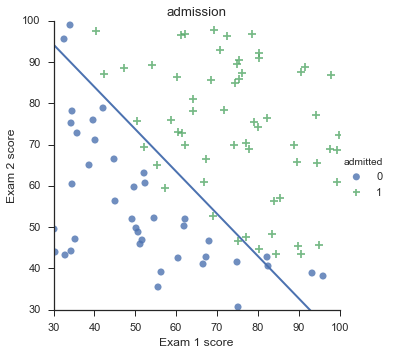

In [172]:
fname='ex2data1.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
df = pd.read_csv(fname,delimiter=',',header=None)
df.columns = ['exam1', 'exam2','admitted']
data=np.asmatrix(df)
X = np.matrix(data[:, 0:2]); 
y = np.matrix(data[:, 2]);
[m, n] = X.shape;
print(['Plotting data with + indicating (y = 1) examples and o  indicating (y = 0) examples.\n']);
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('exam1', 'exam2',
           data=df,
           fit_reg=False,
           hue="admitted",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('admission')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
y=np.ravel(y)
clf = LogisticRegression(solver='newton-cg',).fit(X, y)
theta=clf.intercept_;
theta=np.append(theta,clf.coef_)
#% Plot Boundary
plt.hold(True)
[m, n] = X.shape;
X = np.c_[np.ones(m), data[:,0:2]];
plotDecisionBoundary(theta, X, y,0);

In [234]:
fname='ex2data2.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
df = pd.read_csv(fname,delimiter=',',header=None)
df.columns = ['MicrochipTest1', 'MicrochipTest2','passed']
data=np.asmatrix(df)
X = np.matrix(data[:, 0:2]); 
y = np.matrix(data[:, 2]);
[m, n] = X.shape;
dgr=6;
poly = PolynomialFeatures(dgr)
X_poly=poly.fit_transform(X);
y=np.ravel(y)
clf = LogisticRegression(solver='lbfgs',max_iter=40000,tol=0.00001,fit_intercept=False,C=100).fit(X_poly, y)
#theta=clf.intercept_;
#theta=np.append(theta,clf.coef_)
theta=np.matrix(np.transpose(clf.coef_))


In [177]:
def sigmoid(z):
    #%SIGMOID Compute sigmoid function
    #%g = SIGMOID(z) computes the sigmoid of z.

    #% You need to return the following variables correctly 
    g = np.matrix(np.zeros(np.shape(z)));

#% ====================== YOUR CODE HERE ======================
#% Instructions: Compute the sigmoid of each value of z (z can be a matrix,vector or scalar).
    g = np.divide(1,(1+np.exp(-z)));    
    return g

['Plotting data with + indicating (passed = 1) examples and o  indicating (passed = 0) examples.\n']


<a list of 2 text.Text objects>

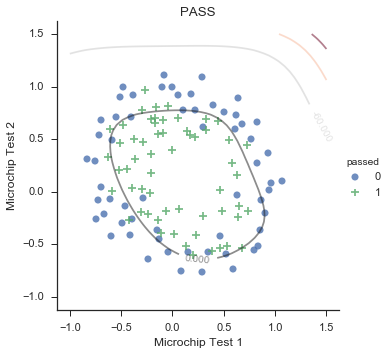

In [235]:
print(['Plotting data with + indicating (passed = 1) examples and o  indicating (passed = 0) examples.\n']);
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('MicrochipTest1', 'MicrochipTest2',
           data=df,
           fit_reg=False,
           hue="passed",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('PASS')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

#% Plot Boundary
plt.hold(True)
u,v,z=plotDecisionBoundary(theta, X_poly, y,dgr);
plt.hold(True)
CS=plt.contour(u, v, z,4,alpha=0.5,cmap='RdGy')
plt.clabel(CS, inline=True, fontsize=10)

In [139]:
def plotDecisionBoundary(theta, X, y,dgr): #using sklearn package
    m,n=X.shape    
    if n <= 3:
        #% Only need 2 points to define a line, so choose two endpoints
        plot_x = (np.min(X[:,2])-2,  np.max(X[:,2])+2);
        #% Calculate the decision boundary line
        plot_y = np.multiply(np.divide(-1,theta[2]),np.multiply(theta[1],plot_x) + theta[0]);

    #% Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y,lw=2);
        plt.axis([30, 100, 30, 100])
    
    #% Legend, specific for the exercise
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,['Admitted', 'Not admitted', 'Decision Boundary'])
        
        
    else:
        poly = PolynomialFeatures(dgr)
        #% Here is the grid range
        u = np.linspace(-1, 1.5, 50);
        v = np.linspace(-1, 1.5, 50);
        u_surf,v_surf=np.meshgrid(u,v);
        z = np.zeros((len(u),len(v)));
        #% Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.matrix(poly.fit_transform([u[i],v[j]]))*theta;
        return u,v,z

In [206]:
def predict(theta, X):
    #%PREDICT Predict whether the label is 0 or 1 using learned logistic 
    #%regression parameters theta
    #%   p = PREDICT(theta, X) computes the predictions for X using a 
    #%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m,n = X.shape; #% Number of training examples

    #% You need to return the following variables correctly
    p = np.zeros((m, 1));

    #% ====================== YOUR CODE HERE ======================
    #% Instructions: Complete the following code to make predictions using
    #%               your learned logistic regression parameters. 
    #%               You should set p to a vector of 0's and 1's

    p= sigmoid(X*theta);
    def comp(x):
        if x>=0.5:
            y=1
        else:
            y=0
        return y
    p = np.array(map(lambda x: comp(x), p))
    return p

In [236]:
p = predict(theta, X_poly);
p = np.ravel(p);
accuracy = np.mean((np.equal(p,y)).astype(int))*100
print('Train Accuracy: %f' %accuracy);
print('Expected accuracy (with lambda = 1): 83.1 (approx)');

Train Accuracy: 83.898305
Expected accuracy (with lambda = 1): 83.1 (approx)
